# Long Short Term Memory


In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [234]:
df = pd.read_csv(r"D:\copy of htdocs\practice\Python\200days\Day199 Deep Learning Day 29\airline-passengers.csv")

In [235]:
df.shape

(144, 2)

In [236]:
df =  df['Passengers']

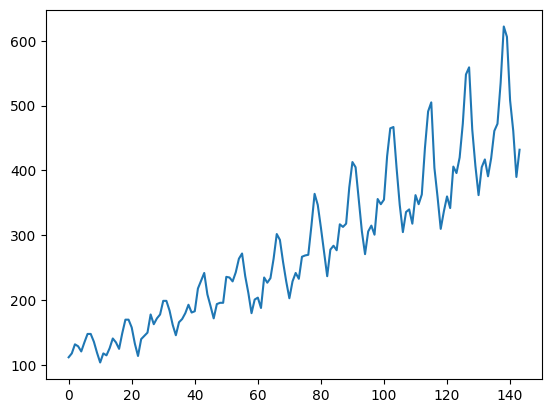

In [237]:
plt.plot(df)

In [238]:
tf.random.set_seed(7001)

In [239]:

df = df.values
df = df.astype('float')

In [240]:
from sklearn.preprocessing import MinMaxScaler

In [241]:
scaler = MinMaxScaler(feature_range=(0,1))

In [242]:
from sklearn.preprocessing import StandardScaler

# Assuming df is a one-dimensional array
df = df.reshape(-1, 1)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [243]:
train_size = int(len(df)*0.67)
test_size = len(df) - train_size

train,test = df[0:train_size,:],df[train_size:len(df),:1]

In [244]:
def cr_df(df,look_back=1):
    dfX, dfY = [],[]

    for i in range(len(df)-look_back-1):
        a = df[i:(i+look_back),0]
        dfX.append(a)
        dfY.append(df[i+look_back,0])
    return np.array(dfX),np.array(dfY)

In [245]:
look_back = 1
trainX, trainY = cr_df(train, look_back)
testX, testY = cr_df(test,look_back)

In [246]:
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))

testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [247]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [248]:
model = Sequential()

In [249]:
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(1))

In [250]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX,trainY, epochs=10,batch_size=1,verbose=2)

Epoch 1/10


94/94 - 1s - loss: 50891.6445 - 1s/epoch - 12ms/step
Epoch 2/10
94/94 - 0s - loss: 50824.7383 - 73ms/epoch - 774us/step
Epoch 3/10
94/94 - 0s - loss: 50757.3711 - 79ms/epoch - 840us/step
Epoch 4/10
94/94 - 0s - loss: 50690.3633 - 76ms/epoch - 807us/step
Epoch 5/10
94/94 - 0s - loss: 50623.2539 - 88ms/epoch - 938us/step
Epoch 6/10
94/94 - 0s - loss: 50556.2891 - 88ms/epoch - 936us/step
Epoch 7/10
94/94 - 0s - loss: 50489.5547 - 80ms/epoch - 851us/step
Epoch 8/10
94/94 - 0s - loss: 50422.4844 - 80ms/epoch - 851us/step
Epoch 9/10
94/94 - 0s - loss: 50355.6758 - 79ms/epoch - 841us/step
Epoch 10/10
94/94 - 0s - loss: 50289.1211 - 78ms/epoch - 831us/step


In [251]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 2ms/step


In [252]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict =  scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [253]:
from sklearn.metrics import mean_squared_error

In [254]:
trainscore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))

print("Train score : %.2f RMSE"%(trainscore))

testscore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

print("Train score : %.2f RMSE"%(testscore))

Train score : 26800.12 RMSE
Train score : 50372.04 RMSE


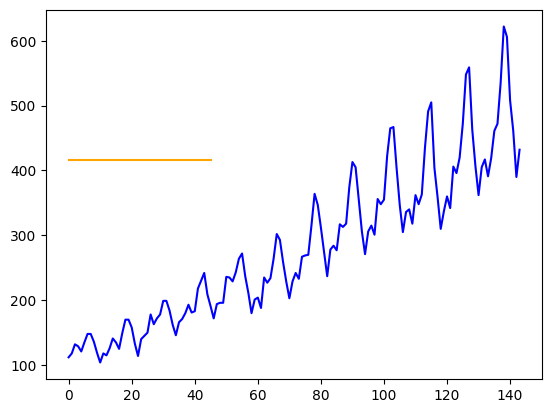

In [260]:
plt.plot(df,color='blue')
plt.plot(testPredict,color='orange')